<a href="https://colab.research.google.com/github/Ryan-alb/MachineLearning/blob/main/notebooks/recomenda%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bing-image-downloader


In [2]:
from bing_image_downloader import downloader

# Lista de classes
classes = ['celular', 'cadeira', 'relogio', 'mochila']

# Número de imagens por classe
num_images = 50

for class_name in classes:
    print(f"Baixando imagens da classe: {class_name}")
    downloader.download(class_name, limit=num_images, output_dir='dataset', adult_filter_off=True, force_replace=False, timeout=60)


Baixando imagens da classe: celular
[%] Downloading Images to /content/dataset/celular


[!!]Indexing page: 1

[%] Indexed 120 Images on Page 1.


[%] Downloading Image #1 from https://pisces.bbystatic.com/image2/BestBuy_US/images/products/6487/6487247_sd.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://laopinion.com/wp-content/uploads/sites/3/2019/12/91qyfetzy6l._sl1500_.jpg?quality=80&amp;strip=all
[%] File Downloaded !

[%] Downloading Image #3 from https://images-na.ssl-images-amazon.com/images/I/811SXtEhBgL._SL1500_.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://cdn1.coppel.com/images/catalog/pm/2946663-1.jpg
[!] Issue getting: https://cdn1.coppel.com/images/catalog/pm/2946663-1.jpg
[!] Error:: The read operation timed out
[%] Downloading Image #4 from https://elsolweb.tv/wp-content/uploads/2016/08/celular.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://cdn.mos.cms.futurecdn.net/TJDYpZN3r8B7onh2imuNah-1200-80.jpg
[%] File Download

In [3]:
!pip install torch torchvision numpy matplotlib scikit-learn pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [4]:
import os
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt


In [5]:
DATASET_PATH = "/content/dataset"  # Caminho onde estão as pastas: celular/, cadeira/, etc.
# Carregar modelo ResNet50 pré-treinado (removendo a camada final de classificação)
model = models.resnet50(pretrained=True)
model = torch.nn.Sequential(*list(model.children())[:-1])  # Remove camada de classificação
model.eval()

# Transformações padrão para ImageNet
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

def extract_features(image_path):
    image = Image.open(image_path).convert('RGB')
    img_t = transform(image).unsqueeze(0)
    with torch.no_grad():
        features = model(img_t)
    return features.squeeze().numpy().flatten()


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 66.9MB/s]


In [6]:
image_paths = []
features_list = []

for class_folder in os.listdir(DATASET_PATH):
    class_path = os.path.join(DATASET_PATH, class_folder)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        image_paths.append(img_path)
        features = extract_features(img_path)
        features_list.append(features)

features_array = np.array(features_list)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [7]:
def recommend(query_img_path, top_k=5):
    query_features = extract_features(query_img_path)
    similarities = cosine_similarity([query_features], features_array)[0]
    top_indices = similarities.argsort()[-top_k:][::-1]

    # Plotar os resultados
    fig, axes = plt.subplots(1, top_k + 1, figsize=(15, 5))

    # Mostrar imagem de consulta
    query_img = Image.open(query_img_path)
    axes[0].imshow(query_img)
    axes[0].set_title('Consulta')
    axes[0].axis('off')

    # Mostrar as imagens mais semelhantes
    for i, idx in enumerate(top_indices):
        img = Image.open(image_paths[idx])
        axes[i + 1].imshow(img)
        axes[i + 1].set_title(f'Similaridade: {similarities[idx]:.2f}')
        axes[i + 1].axis('off')

    plt.tight_layout()
    plt.show()


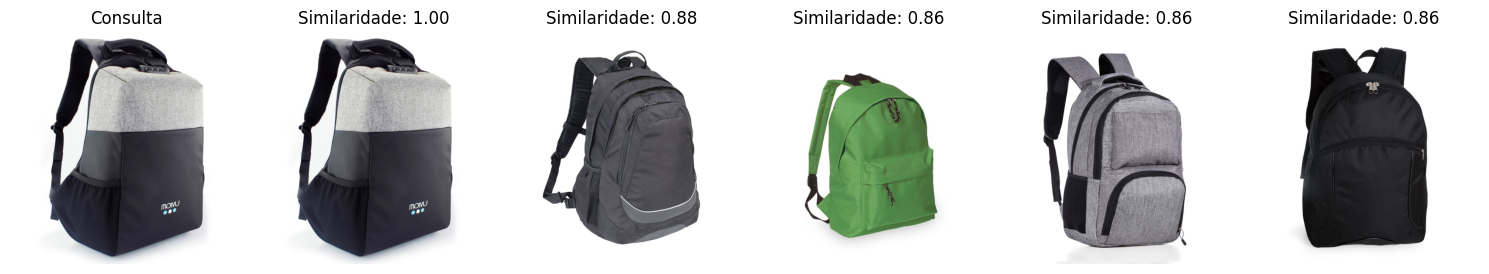

In [9]:
test_image = "/content/dataset/mochila/Image_1.jpg"  # Ajuste o caminho para sua imagem de teste
recommend(test_image, top_k=5)
